# Lab - Transformada Z

Esta atividade explora os conceitos da transformada Z para analizar o comportamento em frequência de sistemas discretos lineares e invariantes ao deslocamento.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [13]:
from pylab import *
from scipy import signal

1) crie uma função H=respfreq(b,a,N) que retorne H, o vetor complexo que contem a resposta em frequência do sistema para N valores de frequencia entre 0 e $\pi$. 

Considere

In [14]:
def respfreq(b,a,N):
    """
    Calcula a resposta em frequencia de um filtro IIR definido pelos coef. b, a 
    para valores de N frequencias digitais entre zero e pi
    retorna o vetor de frquencias w, e o vetor complexo H
    """
    H = Y = X = zeros(N,dtype='complex')
    n = arange(len(a)).reshape(1, len(a))
    w = linspace(0,pi,N).reshape(N, 1)
    
    c = (exp(-1j * w @ n))
    
    Y = c @ b.reshape(len(b), 1)
    X = c @ a.reshape(len(a), 1)

    H = Y/X
    
    return w,H

2) Considere o sistema discreto determinado pelos coeficientes b=[0.2, 0.1, 0.5], a=[1, -1.5, 0.8]. Plote no mesmo eixo a resposta em frequencia do sistema  usando respfreq() e freqz().


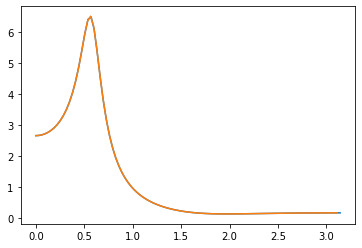

In [15]:
b=array([0.2, 0.1, 0.5])
a=array([ 1 , -1.5,  0.8])

w1, H1 = respfreq(b, a, 100)
w2, H2 = signal.freqz(b, a, 100)
plot(w1, abs(H1), label="respfreq")
plot(w2, abs(H2), label="freqz")

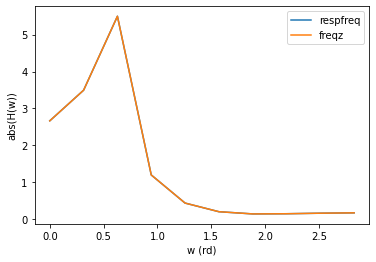

3) Informe os pólos e zeros deste sistema

In [18]:
zeros, polos, ganho = signal.tf2zpk(b, a)
print("Zeros: " + str(zeros))
print("Pólos: " + str(polos))

print(imag(zeros))

Zeros: [-0.25+1.5612495j -0.25-1.5612495j]
Pólos: [0.75+0.48733972j 0.75-0.48733972j]
[ 1.5612495 -1.5612495]


4) plote o diagrama de pólos e zeros

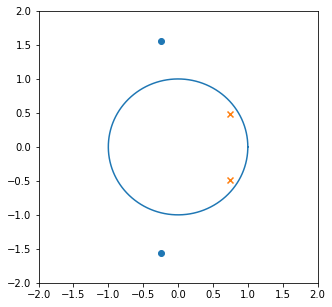

In [33]:
figure(figsize=(5,5))
scatter(real(zeros), imag(zeros), label="Zeros")
scatter(real(polos), imag(polos), label="Pólos", marker="x")
xlim(-2,2)
ylim(-2,2)
theta = linspace(0, 2*pi, 360)
plot(cos(theta), sin(theta))